Create likelihood plots like in  
"Roesch, E., & Stumpf, M. P. H. (2019). Parameter inference in dynamical systems with co-dimension 1 bifurcations. *Royal Society Open Science, 6*(190747). [https://doi.org/10.1098/rsos.190747](https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.190747)"


In [1]:
import sys
sys.path.append('C:/Users/lisah/Documents/Repos/ma-code')
import src
from src.plots_ll_fish import *

- a_vals: [0.1, 0.9, 1.1, 1.3, 1.7] 
- n0_vals: [0.2, 0.4, 1.0, 1.3, 2.3]

In [5]:
# points we consider for likelihood evaluation/ plotting
# note that indexing here is done like in julia as well (starting at 1)
index_combos = [[1,2], [2,4], [3,5], [5,3], [4,1], [2,2]]

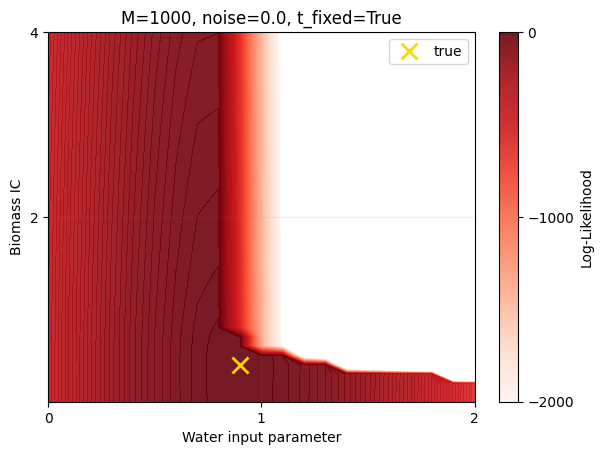

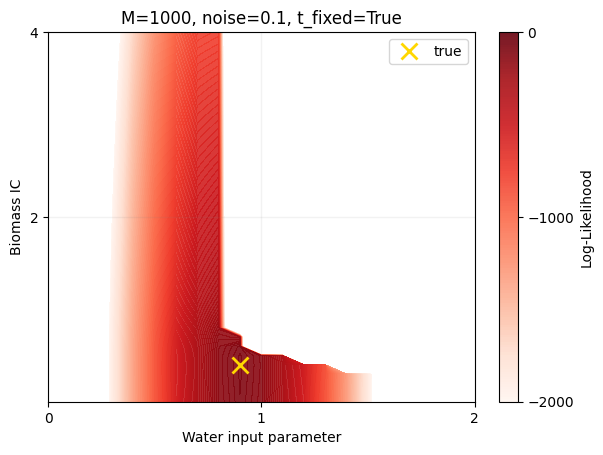

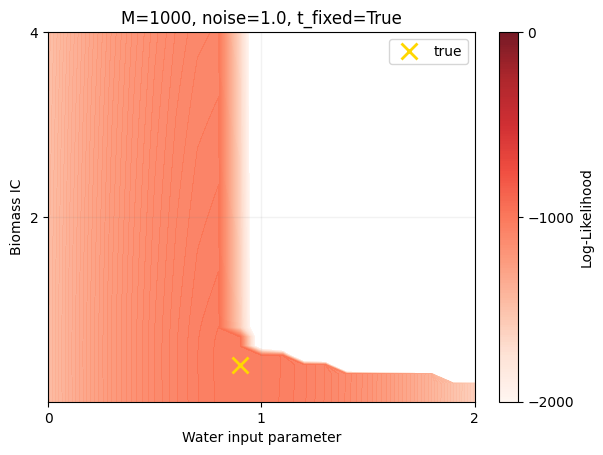

In [9]:
# generate all plots

M_vals = [1000]
noise_vals = [0.0,0.1, 1.0]
m = 0.45 # fix for now as given by literature
w0 = 0.95 # mean(a_vals)
store = False
lower_bound=-2000
t_fixed= True

#path_to_read= f"c:/Users/lisah/Documents/Repos/ma-code/data/likelihood/m0.45/"
path_to_read= f"c:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t500/likelihood/"
path_to_store= f"c:/Users/lisah/Documents/Repos/ma-code/plots/likelihood/m{m}/"

make_all_ll_plots([[2,2]], M_vals, noise_vals, m, w0, t_fixed, lower_bound, path_to_read, path_to_store, store)
#make_all_ll_plots([[2,4]], M_vals, noise_vals, m, w0, "c:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/likelihood/t500/", path_to_store, store)

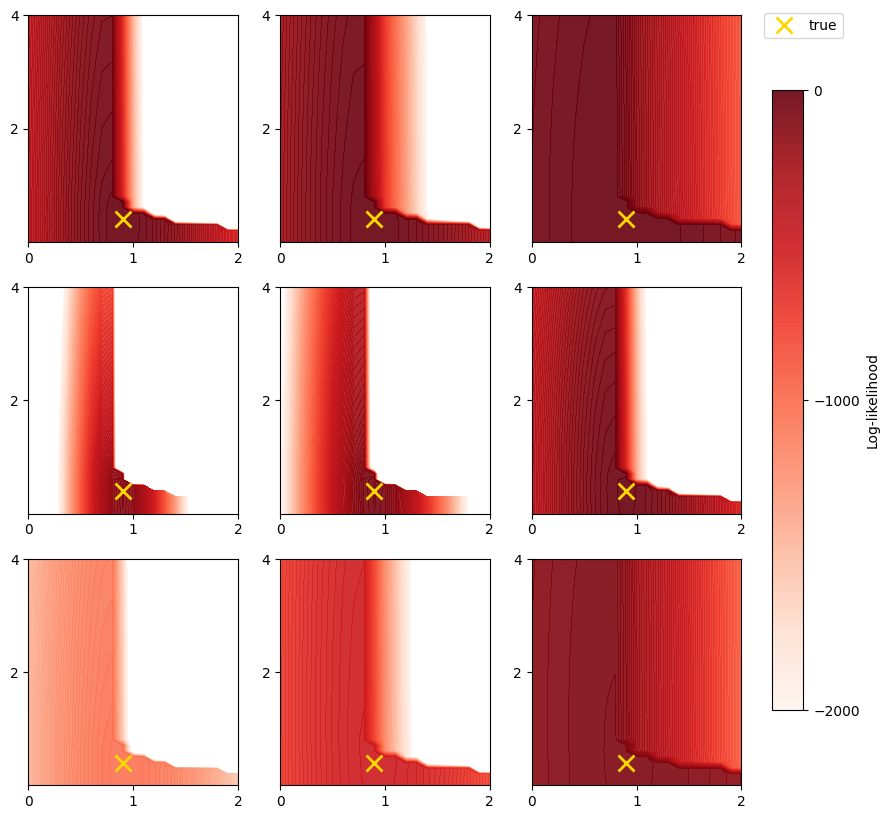

In [11]:
ind = [2,2]
M_vals = [1000,500,100]
noise_vals = [0.0,0.1, 1.0]
m = 0.45 # fix for now as given by literature
w0 = 0.95 # mean(a_vals)
store = False
lower_bound=-2000
t_fixed= True

ll_grid_plot(ind, noise_vals, M_vals, lower_bound, path_to_read, w0,m)